# Graph Theory


Graphs are a useful modeling tool to model complex relational problems. 

We will be using the Python library `networkx` to learn graph theory basics.

[**Networkx**](https://networkx.org/) is a popular tool for  exploration and analysis of networks and network algorithms.

It offers a variety of data structures to represent, visualize and manipulate networks.

First let's import the `networkx` library and save it in the shorthand as `nx`,

In [1]:
import networkx as nx

While `networkx` does provide visualization of graph structures, the main focus is towards analysis and not visualization of graphs.
As of it's current version, it does not adequately support visualizing multi-graphs and other structures.

Currently we use a custom version to draw graphs through `plotting.py` script, which utilizes [`graphviz`](https://graphviz.org/) to plot graphs.

In [2]:
from plotting import draw

> If `graphviz` is not available on your machine, you can still browse the notebooks through `matplotlib` plotting interface. Add argument `engine='matplotlib'` to the `draw()` function.

# Definitions

## Graph

A graph is a tuple $G = (V, E)$ where $V$ is a (finite) set of vertices (or nodes) and $E$ is a finite collection of edges. 

The set $E$ contains elements from the union of the one and two element subsets of $V$ . 

That is, each edge is either a one or two element subset of $V$.

Creating a graph in `networkx` is intuitive,

In [3]:
# Create an empty graph
G = nx.Graph()

# Nodes and edges
nodes = ['Hannover', 'Leipzig', 'Berlin']
edges = [('Hannover', 'Leipzig'), ('Leipzig', 'Berlin'), ('Berlin', 'Hannover')]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Visualize
draw(G)

## Self-Loop

If $G = (V, E)$ is a graph and $v \in V$ and $e = \{v\}$, then edge $e$ is called a self-loop. 

That is, any edge that is a single element subset of $V$ is called a self-loop.

__Example__

If we were to add a self-loop over "Hannover" in the above graph,

In [4]:
H = G.copy()
H.add_edge("Hannover", "Hannover")

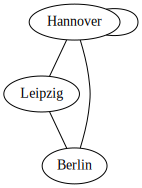

In [5]:
draw(H)

## Vertex Adjacency

Let $G = (V, E)$ be a graph. Two vertices $v_1$ and $v_2$ are said to be adjacent if there exists an edge $e \in E$ so that $e = \{v_1 , v_2 \}$. 

A vertex $v$ is self-adjacent if $e = \{v\}$ is an element of $E$.

__Example__ : 

In the [above example](#Self-Loop), the graph `H` has all the vertices **adjacent** to each other. Vertex `"Hannover"` is **self-adjacent**.

The adjacency object holds the information on adjacent vertices for a given vertex, for example,

In [6]:
G.adj['Hannover']

AtlasView({'Leipzig': {}, 'Berlin': {}})

In [7]:
H.adj['Hannover']

AtlasView({'Leipzig': {}, 'Berlin': {}, 'Hannover': {}})

## Edge Adjacency

Let $G = (V, E)$ be a graph. 

Two edges $e_1$ and $e_2$ are said to be adjacent if there exists a vertex $v$ so that $v$ is an element of both $e_1$ and $e_2$ (as sets). 

An edge $e$ is said to be adjacent to a vertex $v$ if $v$ is an element of $e$ as a set.

__Example__:
    
In the simple [example](#Graph), graph `G` has all the edges to be **adjacent** to each other.

## Neighborhood

Let $G = (V, E)$ be a graph and let $v \in V$ . 

The neighbors of $v$ are the set of vertices that are adjacent to $v$. 

Formally: $ N(v) = \{u \in V : \exists e \in E e = \{ u, v\}  \text{ or } e = u \}$

__Example__:

In graph `H`, the neighbors of vertex `'Hannover'` are,

In [8]:
[n for n in H.neighbors('Hannover')]

['Leipzig', 'Berlin', 'Hannover']

## Degree

Let $G = (V, E)$ be a graph and let $v \in V$ . 

The degree of $v$, written $\operatorname*{deg}(v)$ is the number of non-self-loop edges adjacent to $v$ plus two times the number of self-loops defined at $v$. 

More formally: 
$$\operatorname*{deg}(v) = \lVert \{e \in E : \exists u \in V \text{such that } e = \{u, v\}\} \rVert + 2 \lVert \{e \in E : e = \{v\}\} \rVert$$

> Note that if $S$ is a set, then $\lVert S \rVert$ is the cardinality of that set.

__Example__ :

The degrees of vertices can be computed in `networkx` through `degree` function,

In [9]:
nx.degree(G)

DegreeView({'Hannover': 2, 'Leipzig': 2, 'Berlin': 2})

In [10]:
nx.degree(H)

DegreeView({'Hannover': 4, 'Leipzig': 2, 'Berlin': 2})

## Properties of Degree

### Theorem
<div class="alert alert-block alert-success">
Let $G = (V, E)$ be a (general) graph then:
$2 \lvert E \rvert = \sum_{v \in V} \operatorname*{deg}(v).$
</div>

#### Proof

Consider two vertices $v_1, v_2 \in V$ . 

If $e = \{v_1 , v_2\}$ then it contributes 1 to $ \sum_{v \in V} \operatorname*{deg}(v)$
for both $v_1$ and $v_2$.  Thus, every non-self-loop edge contributes 2 to the vertex degree sum. 

If $e = {v_1}$ were a self-loop, then this edge contributes 2 to the $\operatorname*{deg}(v_1)$. 

Therefore, every edge contributes exactly 2 to the vertex degree sum. Theorem result follows immediately.

#### Corollary
<div class="alert alert-block alert-info">
Let $G = (V, E)$. Then there are an even number of vertices in $V$ with odd degree.
</div>

## Subgraphs

For a graph $G = (V, E)$, a graph $H = (V^\prime , E^\prime)$ is a **subgraph** of $G$ if $V^\prime \subseteq V$
and $E^\prime \subseteq E$. 

The subgraph $H$ is *proper* if $V^\prime \subsetneq V$ or $E^\prime \subsetneq E$.

## Spanning Subgraphs

Let $G = (V, E)$ be a graph and $H = (V^\prime , E^\prime )$ be a subgraph of $G$. 

The subgraph $H$ is a **spanning subgraph** of $G$ if $V^\prime = V$.

## Walk

Let $G = (V, E)$ be a graph. 

A **walk** $w = (v_1 ; e_1 ; v_2 ; e_2 ; . . . ; v_n ; e_n ; v_{n+1} )$ in $G$ is an alternating sequence of vertices and edges in $V$ and $E$ respectively so that for all
$i = 1, . . . , n : \{v_{i} , v_{i+1} \} = e_i$ . 

- A walk is called **closed** if $v_1 = v_{n+1}$ and **open** otherwise. 
- A walk consisting of only one vertex is called **trivial**.

### Subwalk

Let $G = (V, E)$ be a graph. If $w$ is a walk in $G$ then a sub-walk of $w$ is any walk $w_0$ that is also a sub-sequence of $w$.

## Trail and Tour

Let $G = (V, E)$ be a graph. 

A **trail** in $G$ is a walk in which no edge is repeated. 

A **tour** is a closed trail.


Additionally, 
- An **Eulerian trail** is a trail that contains exactly one copy of each edge in $E$.
- An **Eulerian tour** is a closed trail (tour) that contains exactly one copy of each edge.

## Path

For a graph $G = (V, E)$, 

A **path** in $G$ is a _non-trivial_ walk with no vertex and no edge repeated. 

> A **Hamiltonian path** is a path that contains exactly one copy of each vertex in $V$ .

## Cycle

A closed walk of length at least 3 and with no repeated edges and in which the only repeated vertices are the first and the last is called a **cycle**. 

> A **Hamiltonian cycle** is a cycle in a graph containing every vertex

# Representing graphs as matrices

## Adjacency Matrix

A graph $G$ with vertex set $\{v_1, . . . , v_n\}$ can be represented by an adjacency matrix 

$$A = A(G) = (a_{ij})$$ 

defined to be the $n \times n$ matrix such that 

$$a_{ij} = \begin{cases} 1 \text{ iff } \{v_i, v_j\} \in E(G), \\ 0 \text{ otherwise}. \end{cases}
$$

__Example__:

For graph $G$ from above, the adjacency matrix is given as,

In [11]:
A = nx.adjacency_matrix(G) # returns sparse matrix useful for large graphs.
A.todense()

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

## Isomorphism

The graphs $G$ and $G^\prime$ are isomorphic if and only if their adjacency matrices are
related by, 
$$ A = P^\top A^\prime P, $$
for some permutation matrix P.

> A permutation matrix is a matrix gotten from the identity by permuting the columns (i.e., switching some of the columns).

## Counting Walks

### Theorem
<div class="alert alert-block alert-success">
Let $A$ be the adjacency matrix of a graph $G$, where $V(G) = \{v_1 , v_2 , . . . , v_n \}$ .
Then the $(i, j)$ entry of $A^k$ , where $k \ge 1$, is the number of different $v_i v_j$-walks of length $k$ in $G$.
</div>

#### Proof

We induct on $k$. 
Certainly this is true for $k = 1$. 
Now suppose $A^k = \left( a_{ij}^{(k)} \right)$ gives the number of $v_i v_j$-walks of length $k$. 
We can consider the entries of $A^{k+1} = A^k A$. We have,
$$ a_{ij}^{(k+1)} = \sum_{m=1}^{p} a_{im}^{(k)} a_{mj}.$$
This is the sum of all walks of length $m$ between $v_i$ and $v_k$ followed by a walk from $v_k$ to $v_j$ of length 1. 
All walks of length $k+1$ are generated in this way, and so the theorem is proven.


# Other (important) Graph Types and Trees

## Simple Graphs
A graph $G = (V, E)$ is a simple graph if $G$ has no edges that are self-loops and if $E$ is a subset of two element subsets of $V$.

## Multi Graphs

A graph $G = (V, E)$ is a multigraph if there are two edges $e_1$ and $e_2$ in E so that $e_1$ and $e_2$ are equal as sets. That is, there are two vertices $v_1$ and $v_2$ in $V$ so that $e_1 = e_2 = \{v_1 , v_2 \}$.

## Directed graphs or Digraphs

A directed graph (digraph) is a tuple $G = (V, E)$ where $V$ is a (finite) set of vertices and $E$ is a collection of elements contained in $V \times V$ with $E$ being a collection of *ordered pairs* of vertices. 

The edges in $E$ are called *directed edges* to distinguish them from those edges. 

Additionally, the *source* (or tail) of a (directed) edge $e = (v_1 , v_2)$ is $v_1$ while the *destination* (or sink or head) of the edge is $v_2$ .

## Graph Types and `networkx`

NetworkX implements different Python classes for the different types mentioned above.

| Networkx Class | Type       | Self-loops allowed | Parallel edges allowed |
-----------------|------------|--------------------|------------------------|
| [Graph](https://networkx.org/documentation/stable/reference/classes/graph.html)    | undirected | Yes                | No                     |
| [DiGraph](https://networkx.org/documentation/stable/reference/classes/digraph.html)        | directed   | Yes                | No                     |
| [MultiGraph](https://networkx.org/documentation/stable/reference/classes/multigraph.html)     | undirected | Yes                | Yes                    |


There's additionally a `MultiDiGraph` which we are not delving into here.

# Spectral Graph Theory

Spectral Graph Theory specifically deals with studying Graphs through Matrix theory. Graphs as you have seen can be represented as matrices and as such, can be studied through their association.

> Recall that an eigenvalue of a matrix $M$ is a number $\lambda$ such that there is a vector $v$ (called the corresponding eigenvector) such that, $$Mv = \lambda v.$$

- Symmetric $n \times n$ matrices have $n$ eigenvalues. 
- Adjacency matrices of two isomorphic graphs are related by permutation matrices.
- <span style="color:blue">Set of eigenvalues of $A$ is an invariant of a graph!</span>

Defining invariants of mathematical object are essential. The Laplace operator on functions in Euclidean space is fundamental because of
its translational and rotational invariance - a similar notion can be analogously designed for a graph.

## Graph Laplacian

Given a graph $G$ with an adjacency matrix $A$ , the **Laplacian** of $G$ is defined to be the matrix,

$$L = D - A,$$

where $D$ is the diagonal matrix whose entries are the vertex degrees.

> - Laplacian Matrix is also symmetric
> - The set of eigenvalues of the Laplacian is called the spectrum of the Laplacian.

__Example__:

To compute the Laplacian using `networkx`

In [12]:
L = nx.laplacian_matrix(G) 
L.todense()

array([[ 2, -1, -1],
       [-1,  2, -1],
       [-1, -1,  2]])

## Properties of Graph Laplacian

### Theorem
<div class="alert alert-block alert-success">
Let $G$ be a finite graph. The eigenvalues of the matrix $L$ are all non-negative.
Moreover, the constant vector $\vec{1} = (1, 1, 1, . . . ,1)$ is an eigenvector with eigenvalue zero.
</div>

#### Proof

It is noted that $\vec{1}$ is an eigenvector with eigenvalue $0$ since the sum of the entries in each row
must be zero. Now, notice that we can write,

$$
\begin{aligned}
v^\top L v &= \sum_i v_i (Lv)_i
\\
&= \sum_i v_i \sum_j L_{ij} v_j
\\
&= \sum_{\{v_i, v_j\} \in E} v_i (v_i - v_j)
\\
&= \frac{1}{2} \left[
    \sum_{\{v_i, v_j\} \in E} v_i (v_i - v_j) + \sum_{\{v_i, v_j\} \in E} v_j (v_j - v_i)
    \right]
\\
&= \frac{1}{2} \sum_{\{v_i, v_j\} \in E} (v_i - v_j)^2 \ge 0.
\end{aligned}
$$

(The sums over $i$ are over all vertices, but the sums over $\{v_i,v_j\} \in E$ is the sum over the edges.)

Now note that if $v$ is an eigenvector of $L$ with eigenvalue $\lambda$ , then $Lv = \lambda v$, and,

$$v^\top L v = \lambda v^T v = \lambda \sum_i v_i^2.$$

Thus we have that,

$$
\lambda = \dfrac{0.5 \sum_{\{v_i, v_j\} \in E} (v_i - v_j)^2}{\sum_i v_i^2} \ge 0. 
$$

# Acyclic Graphs and Trees

## Connectedness

A graph $G$ is **connected** if for every pair of vertices $v_1$ and $v_2$ in $V$ , $v_2$ is reachable from $v_1$ i.e. there exists a path between $v_1$ and $v_2$.

If $G$ is a digraph, then $G$ is connected if its underlying graph is connected. 

A graph that is not connected is called **disconnected**.

## Component

Let $G = (V, E)$ be a graph. A subgraph $H$ of $G$ is a **component** of $G$ if:

1. $H$ is connected and
2. If $K$ is a subgraph of $G$ and $H$ is a proper subgraph of $K$, then $K$ is not connected.


> Additional concepts of "strong" and "weak" connectedness exist for directed graphs (not addressed here).

__In `networkx`__:

A graph can be checked if it is connected or otherwise by,

In [13]:
nx.is_connected(G)

True

In [14]:
nx.number_connected_components(G)

1

In [15]:
print(list(nx.connected_components(G)))

[{'Leipzig', 'Hannover', 'Berlin'}]


## Acyclic Graphs

A graph that contains no cycles is called **acyclic**.

## Trees and Forests

Let $G = (V ; E)$ be an acyclic graph. 

If $G$ has one component, then $G$ is called a **tree**.

If $G$ has more than one component, then $G$ is called a **forest**. 

## Spanning Tree and Forest

Let $G = (V, E)$ be a graph. 

If $F = (V_0 ; E_0 )$ is an acyclic subgraph of $G$ such that $V = V_0$ then $F$ is called a **spanning forest** of $G$. 

If $F$ has exactly one component, then $F$ is called a **spanning tree**.

### Theorem
<div class="alert alert-block alert-success">
    If $G = (V, E)$ is a connected graph, then there is a spanning tree $T = (V, E_0)$ of $G$.
</div>

#### Proof

The proof follows by induction, and requires introduction of cut-vertices which are not addressed in this lecture. 

> For trees and forests, the adjective “spanning” is added to designate that the graph, when considered as a forest, consists of a single tree that includes all nodes in the graph. It is true, by definition, that every tree is spanning with respect to the nodes that define the tree and so, it might seem redundant to introduce the notion of “spanning”. However, the nodes may represent a subset of nodes from a larger graph, and it is in this context that the term “spanning” becomes a useful notion.

__In `networkx`__:

The useful notions to check with regard to the tree/forest within a graph is to 

- Check if a graph/subgraph is a Tree/Forest : this can be done by the following functions
    -`nx.is_tree()` 
    -`nx.is_forest()`.
- To find the minimum/maximum spanning tree/forest within a graph : this can be done by,
    - `nx.minimum_spanning_tree()` and `nx.maximum_spanning_tree()`
    - `nx.minimum_spanning_edges()` and `nx.maximum_spanning_edges()` 

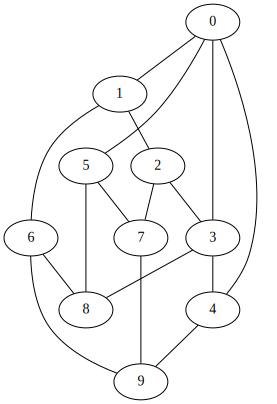

In [16]:
G = nx.petersen_graph()
G.add_edge(0, 3, weight=2)

draw(G)

In [17]:
T = nx.minimum_spanning_tree(G)
sorted(T.edges(data=True))


[(0, 1, {}),
 (0, 4, {}),
 (0, 5, {}),
 (1, 2, {}),
 (1, 6, {}),
 (2, 3, {}),
 (2, 7, {}),
 (3, 8, {}),
 (4, 9, {})]

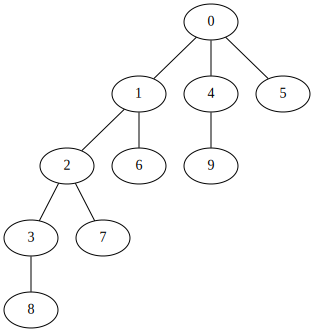

In [18]:
draw(T)

In [19]:
nx.is_tree(T)

True